## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 512 
nb_epoch = 40

# Assignment -:

# dropout = 0.5

<h2> 1. MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers </h2>

In [14]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600)  = 0.057  => N(0,σ) = N(0,0.057)

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/300) = 0.081  => N(0,σ) = N(0,0.081)

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               180300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
___________________________

In [15]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 15s 258us/step - loss: 0.5495 - acc: 0.8379 - val_loss: 0.1766 - val_acc: 0.9457
Epoch 2/40
60000/60000 [==============================] - 12s 198us/step - loss: 0.2328 - acc: 0.9295 - val_loss: 0.1284 - val_acc: 0.9593
Epoch 3/40
60000/60000 [==============================] - 11s 185us/step - loss: 0.1791 - acc: 0.9447 - val_loss: 0.1078 - val_acc: 0.9679
Epoch 4/40
60000/60000 [==============================] - 11s 189us/step - loss: 0.1448 - acc: 0.9558 - val_loss: 0.0895 - val_acc: 0.9717
Epoch 5/40
60000/60000 [==============================] - 12s 198us/step - loss: 0.1246 - acc: 0.9611 - val_loss: 0.0844 - val_acc: 0.9720
Epoch 6/40
60000/60000 [==============================] - 12s 192us/step - loss: 0.1073 - acc: 0.9653 - val_loss: 0.0771 - val_acc: 0.9763
Epoch 7/40
60000/60000 [==============================] - 11s 191us/

Test score: 0.06686596488867799
Test accuracy: 0.9827


<IPython.core.display.Javascript object>


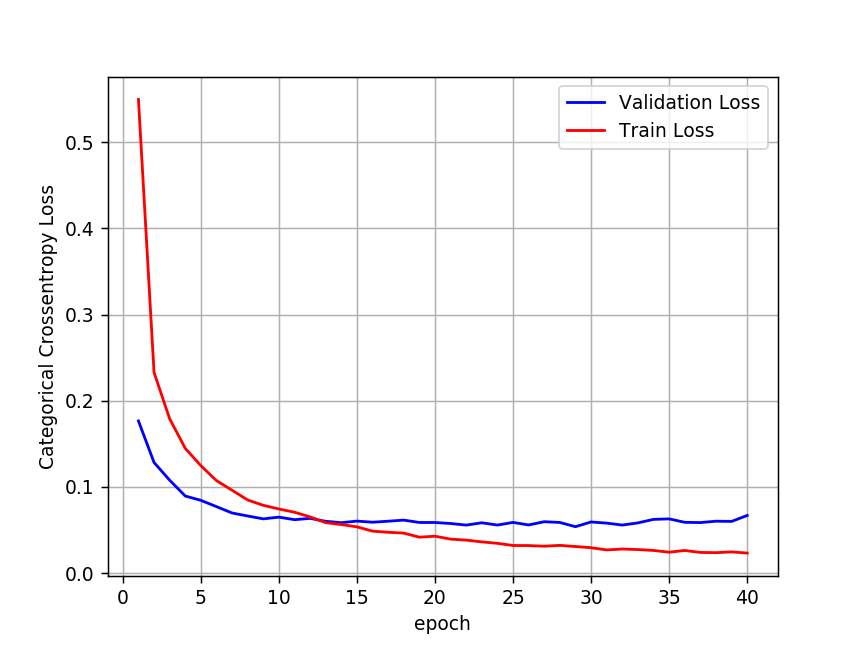

In [16]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


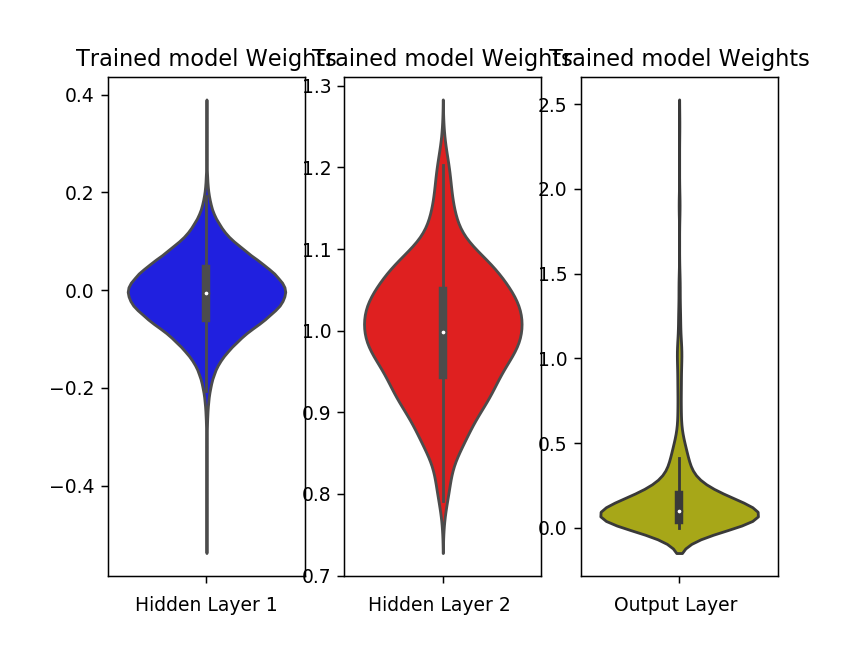

In [18]:
w_after = model_drop.get_weights()
# print(w_after)
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2. MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layer </h2>

In [13]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h2 =>  σ=√(2/(fan_in) = sqrt(2/512) = 0.062  => N(0,σ) = N(0,0.062)

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


# h2 =>  σ=√(2/(fan_in) = sqrt(2/128) = 0.125  => N(0,σ) = N(0,0.125)
model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/64) = 0.176  => N(0,σ) = N(0,0.176)
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 8s 127us/step - loss: 1.0945 - acc: 0.6569 - val_loss: 0.2883 - val_acc: 0.9144
Epoch 2/40
60000/60000 [==============================] - 6s 93us/step - loss: 0.4611 - acc: 0.8655 - val_loss: 0.2000 - val_acc: 0.9393
Epoch 3/40
60000/60000 [==============================] - 6s 95us/step - loss: 0.3344 - acc: 0.9044 - val_loss: 0.1600 - val_acc: 0.9524
Epoch 4/40
60000/60000 [==============================] - 6s 95us/step - loss: 0.2724 - acc: 0.9233 - val_loss: 0.1344 - val_acc: 0.9586
Epoch 5/40
60000/60000 [==============================] - 6s 92us/step - loss: 0.2272 - acc: 0.9357 - val_loss: 0.1186 - val_acc: 0.9634
Epoch 6/40
60000/60000 [==============================] - 6s 94us/step - loss: 0.1989 - acc: 0.9439 - val_loss: 0.1094 - val_acc: 0.9678
Epoch 7/40
60000/60000 [==============================] - 6s 93us/step - loss: 

Test score: 0.06952727799937565
Test accuracy: 0.9829


<IPython.core.display.Javascript object>


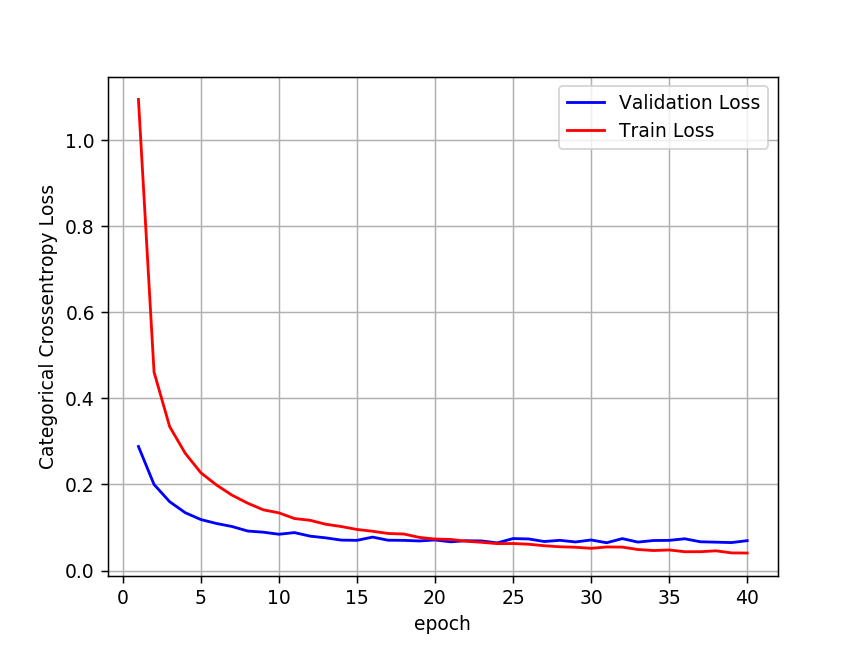

In [15]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


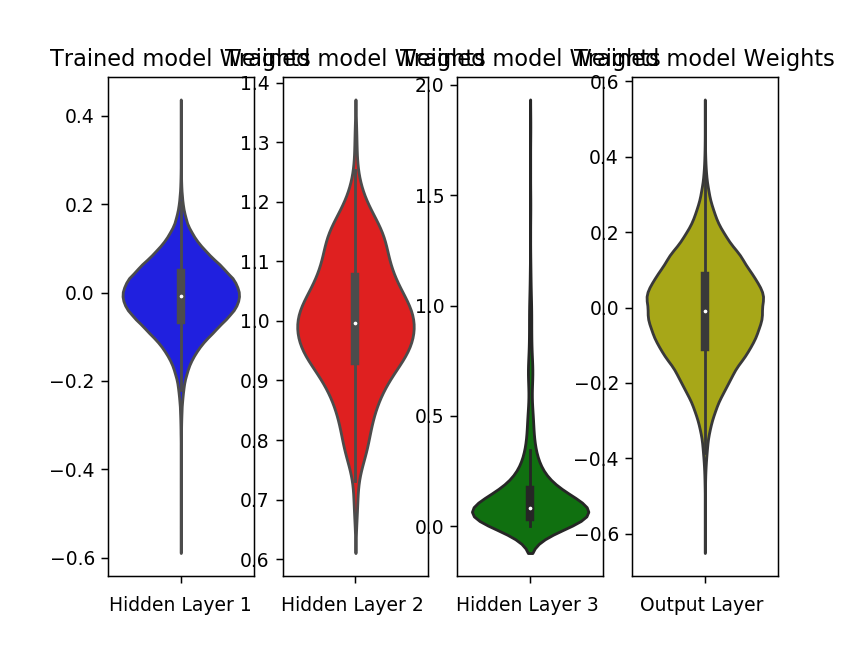

In [18]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3. MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layer </h2>

In [19]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600) = 0.057  => N(0,σ) = N(0,0.057)
model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/400) = 0.070  => N(0,σ) = N(0,0.070)
model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h3 =>  σ=√(2/(fan_in) = sqrt(2/200) = 0.1  => N(0,σ) = N(0,0.1)
model_drop.add(Dense(200, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h4 =>  σ=√(2/(fan_in) = sqrt(2/100) = 0.141  => N(0,σ) = N(0,0.141)
model_drop.add(Dense(100, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

# h5 =>  σ=√(2/(fan_in) = sqrt(2/50) = 0.2  => N(0,σ) = N(0,0.2)
model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               240400    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
__________

In [20]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 12s 194us/step - loss: 1.8458 - acc: 0.4149 - val_loss: 0.4715 - val_acc: 0.8593
Epoch 2/40
60000/60000 [==============================] - 10s 161us/step - loss: 0.7633 - acc: 0.7644 - val_loss: 0.2627 - val_acc: 0.9250
Epoch 3/40
60000/60000 [==============================] - 10s 160us/step - loss: 0.4806 - acc: 0.8665 - val_loss: 0.2031 - val_acc: 0.9453
Epoch 4/40
60000/60000 [==============================] - 9s 157us/step - loss: 0.3598 - acc: 0.9051 - val_loss: 0.1780 - val_acc: 0.9523
Epoch 5/40
60000/60000 [==============================] - 9s 157us/step - loss: 0.2975 - acc: 0.9244 - val_loss: 0.1583 - val_acc: 0.9568
Epoch 6/40
60000/60000 [==============================] - 9s 157us/step - loss: 0.2580 - acc: 0.9360 - val_loss: 0.1354 - val_acc: 0.9637
Epoch 7/40
60000/60000 [==============================] - 10s 166us/step - loss: 0.2233 - acc: 0.9436 - val_loss: 0.121

Test score: 0.08058400104563335
Test accuracy: 0.9837


<IPython.core.display.Javascript object>


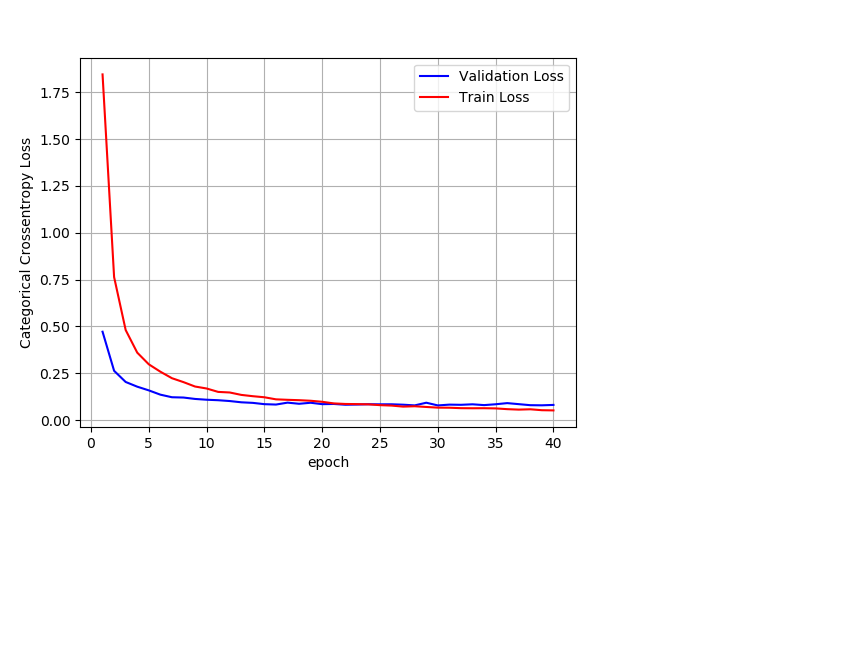

In [21]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


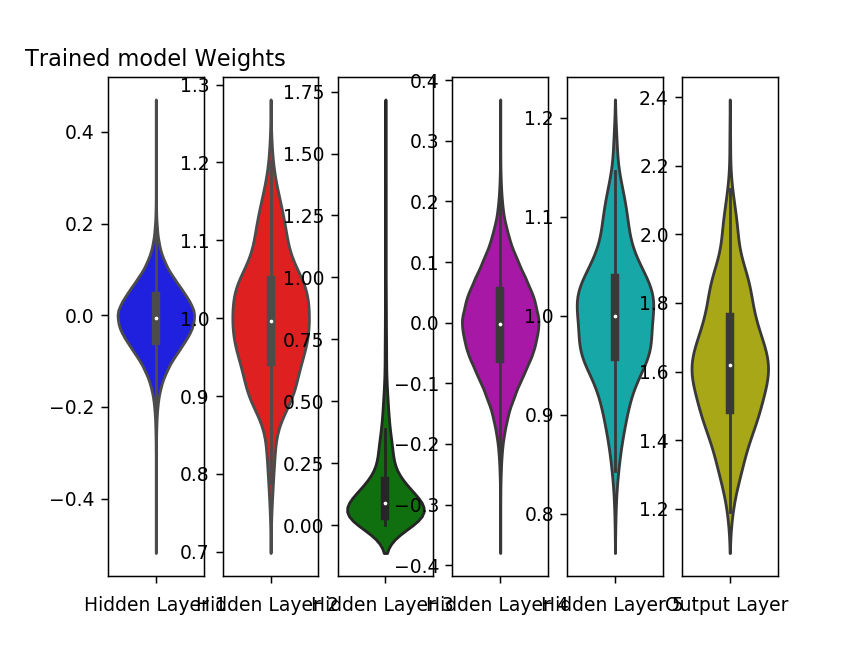

In [25]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Different Droup out

# Dropout = 0.8

<h2> 1. MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers </h2>

In [13]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600)  = 0.057  => N(0,σ) = N(0,0.057)

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/300) = 0.081  => N(0,σ) = N(0,0.081)

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 175us/step - loss: 1.5463 - acc: 0.5945 - val_loss: 0.3230 - val_acc: 0.9056
Epoch 2/40
60000/60000 [==============================] - 8s 132us/step - loss: 0.6205 - acc: 0.8074 - val_loss: 0.2589 - val_acc: 0.9239
Epoch 3/40
60000/60000 [==============================] - 8s 133us/step - loss: 0.4782 - acc: 0.8529 - val_loss: 0.2178 - val_acc: 0.9353
Epoch 4/40
60000/60000 [==============================] - 8s 136us/step - loss: 0.4096 - acc: 0.8762 - val_loss: 0.1971 - val_acc: 0.9421
Epoch 5/40
60000/60000 [==============================] - 8s 133us/step - loss: 0.3608 - acc: 0.8921 - val_loss: 0.1782 - val_acc: 0.9465
Epoch 6/40
60000/60000 [==============================] - 8s 136us/step - loss: 0.3296 - acc: 0.9020 - val_loss: 0.1655 - val_acc: 0.9497
Epoch 7/40
60000/60000 [==============================] - 8s 138us/step -

Test score: 0.0744698858253425
Test accuracy: 0.979


<IPython.core.display.Javascript object>


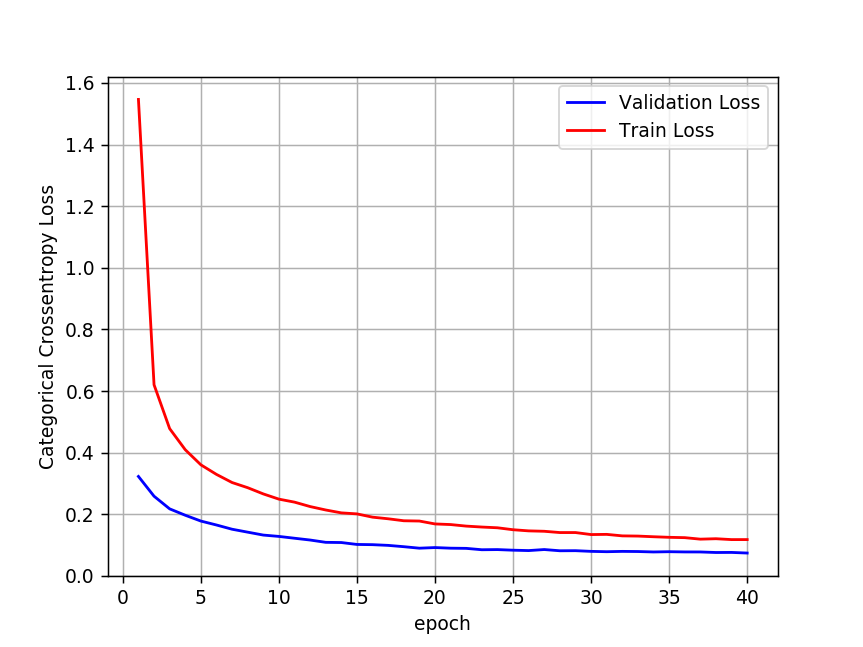

In [15]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


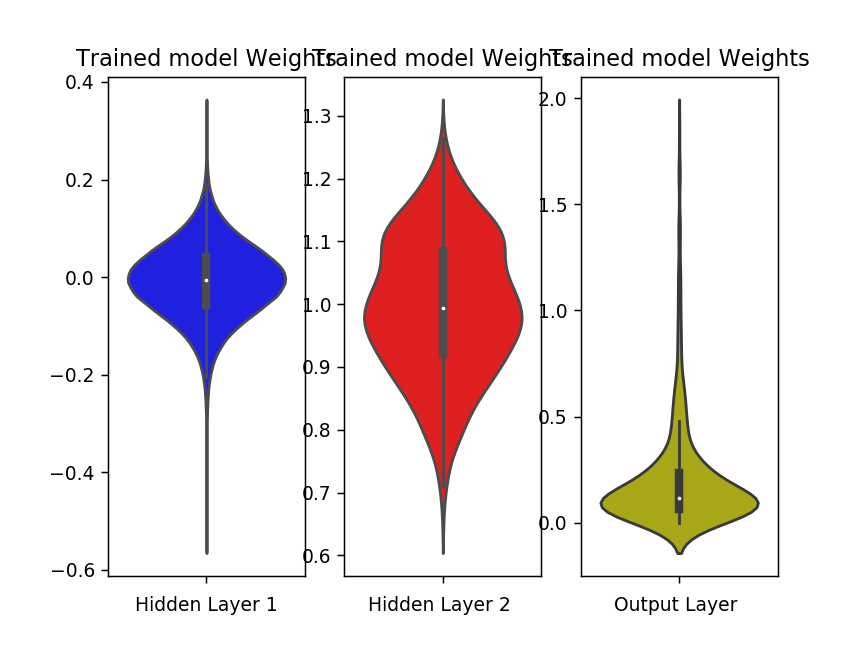

In [16]:
w_after = model_drop.get_weights()
# print(w_after)
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2. MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layer </h2>

In [17]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h2 =>  σ=√(2/(fan_in) = sqrt(2/512) = 0.062  => N(0,σ) = N(0,0.062)

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))


# h2 =>  σ=√(2/(fan_in) = sqrt(2/128) = 0.125  => N(0,σ) = N(0,0.125)
model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/64) = 0.176  => N(0,σ) = N(0,0.176)
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
__________

In [18]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 8s 135us/step - loss: 3.2564 - acc: 0.1682 - val_loss: 1.3830 - val_acc: 0.6426
Epoch 2/40
60000/60000 [==============================] - 6s 107us/step - loss: 1.9824 - acc: 0.3192 - val_loss: 1.1114 - val_acc: 0.7404
Epoch 3/40
60000/60000 [==============================] - 7s 114us/step - loss: 1.5745 - acc: 0.4385 - val_loss: 0.8893 - val_acc: 0.8036
Epoch 4/40
60000/60000 [==============================] - 7s 112us/step - loss: 1.3617 - acc: 0.5171 - val_loss: 0.7172 - val_acc: 0.8496
Epoch 5/40
60000/60000 [==============================] - 7s 111us/step - loss: 1.1915 - acc: 0.5816 - val_loss: 0.5895 - val_acc: 0.8755
Epoch 6/40
60000/60000 [==============================] - 7s 114us/step - loss: 1.0796 - acc: 0.6258 - val_loss: 0.5029 - val_acc: 0.8933
Epoch 7/40
60000/60000 [==============================] - 7s 112us/step - loss: 0.9824 - acc: 0.6647 - val_loss: 0.4334 - 

Test score: 0.13166434424892068
Test accuracy: 0.9683


<IPython.core.display.Javascript object>


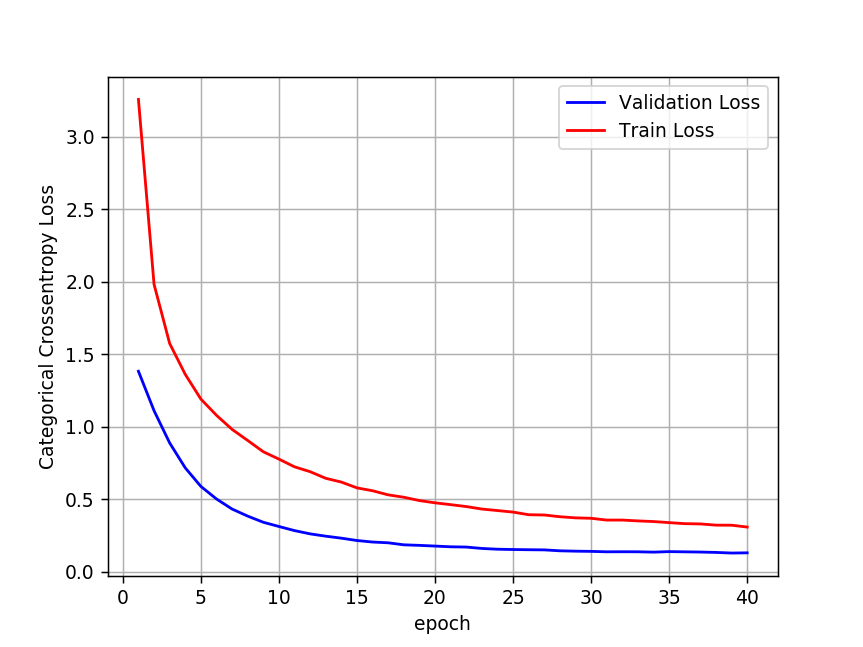

In [19]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


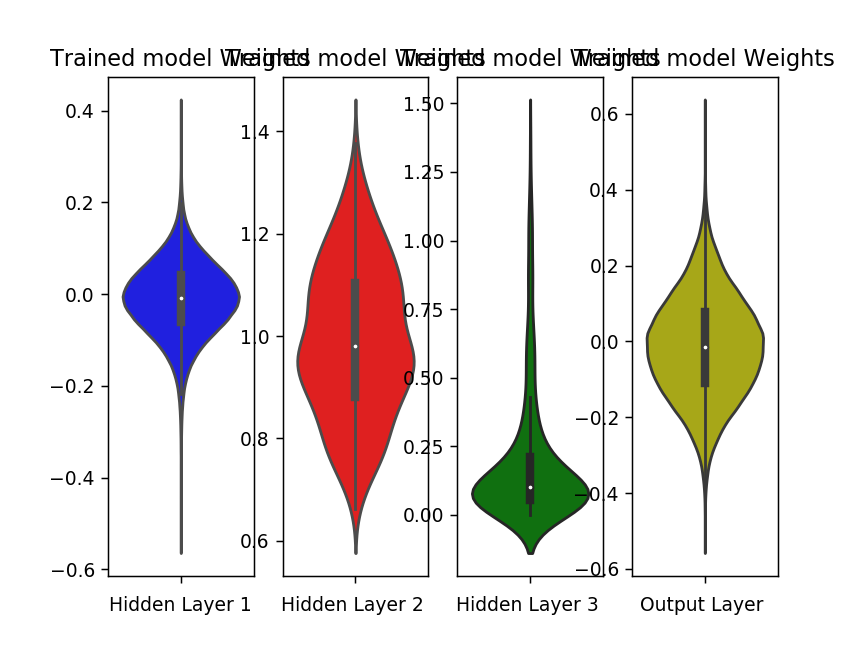

In [20]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3. MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layer </h2>

In [21]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600) = 0.057  => N(0,σ) = N(0,0.057)
model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/400) = 0.070  => N(0,σ) = N(0,0.070)
model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h3 =>  σ=√(2/(fan_in) = sqrt(2/200) = 0.1  => N(0,σ) = N(0,0.1)
model_drop.add(Dense(200, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h4 =>  σ=√(2/(fan_in) = sqrt(2/100) = 0.141  => N(0,σ) = N(0,0.141)
model_drop.add(Dense(100, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

# h5 =>  σ=√(2/(fan_in) = sqrt(2/50) = 0.2  => N(0,σ) = N(0,0.2)
model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 600)               471000    
_________________________________________________________________
batch_normalization_6 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               240400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
__________

In [22]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 12s 207us/step - loss: 3.7483 - acc: 0.1054 - val_loss: 2.3293 - val_acc: 0.1259
Epoch 2/40
60000/60000 [==============================] - 9s 158us/step - loss: 2.5755 - acc: 0.1356 - val_loss: 2.1954 - val_acc: 0.1666
Epoch 3/40
60000/60000 [==============================] - 10s 158us/step - loss: 2.2133 - acc: 0.1708 - val_loss: 2.1430 - val_acc: 0.1795
Epoch 4/40
60000/60000 [==============================] - 10s 161us/step - loss: 2.1247 - acc: 0.1882 - val_loss: 2.1189 - val_acc: 0.1858
Epoch 5/40
60000/60000 [==============================] - 10s 161us/step - loss: 2.0899 - acc: 0.1964 - val_loss: 2.0994 - val_acc: 0.1893
Epoch 6/40
60000/60000 [==============================] - 10s 161us/step - loss: 2.0662 - acc: 0.2047 - val_loss: 2.0807 - val_acc: 0.1945
Epoch 7/40
60000/60000 [==============================] - 10s 162us/step - loss: 2.0482 - acc: 0.2108 - val_loss: 2.0

Test score: 0.8180086185455322
Test accuracy: 0.6545


<IPython.core.display.Javascript object>


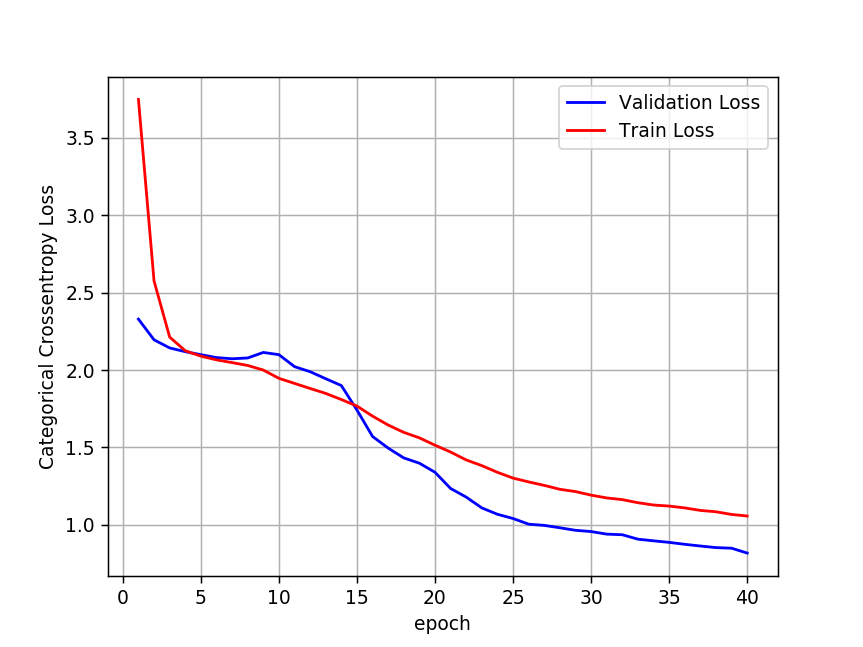

In [23]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


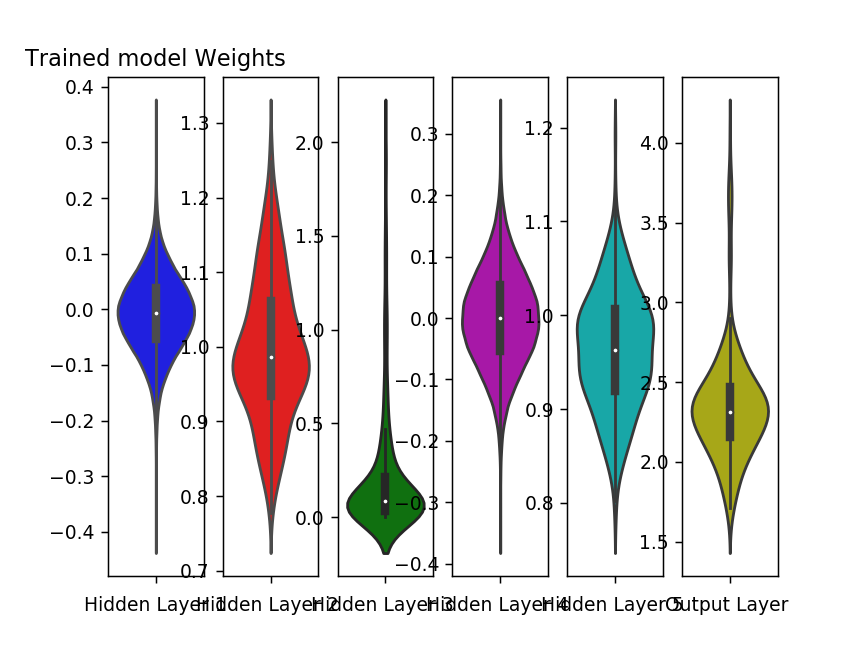

In [24]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Droupout = 0.3

<h2> 1. MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers </h2>

In [25]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600)  = 0.057  => N(0,σ) = N(0,0.057)

model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/300) = 0.081  => N(0,σ) = N(0,0.081)

model_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.081, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_11 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_11 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                3010      
Total para

In [26]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 16s 264us/step - loss: 0.3655 - acc: 0.8893 - val_loss: 0.1331 - val_acc: 0.9595
Epoch 2/40
60000/60000 [==============================] - 13s 213us/step - loss: 0.1476 - acc: 0.9550 - val_loss: 0.0979 - val_acc: 0.9705
Epoch 3/40
60000/60000 [==============================] - 13s 212us/step - loss: 0.1045 - acc: 0.9679 - val_loss: 0.0814 - val_acc: 0.9731
Epoch 4/40
60000/60000 [==============================] - 13s 217us/step - loss: 0.0819 - acc: 0.9747 - val_loss: 0.0740 - val_acc: 0.9765
Epoch 5/40
60000/60000 [==============================] - 13s 212us/step - loss: 0.0646 - acc: 0.9793 - val_loss: 0.0666 - val_acc: 0.9800
Epoch 6/40
60000/60000 [==============================] - 13s 215us/step - loss: 0.0537 - acc: 0.9832 - val_loss: 0.0645 - val_acc: 0.9809
Epoch 7/40
60000/60000 [==============================] - 12s 205us/step - loss: 0.0481 - acc: 0.9845 - val_loss: 0.

Test score: 0.07431980368123432
Test accuracy: 0.984


<IPython.core.display.Javascript object>


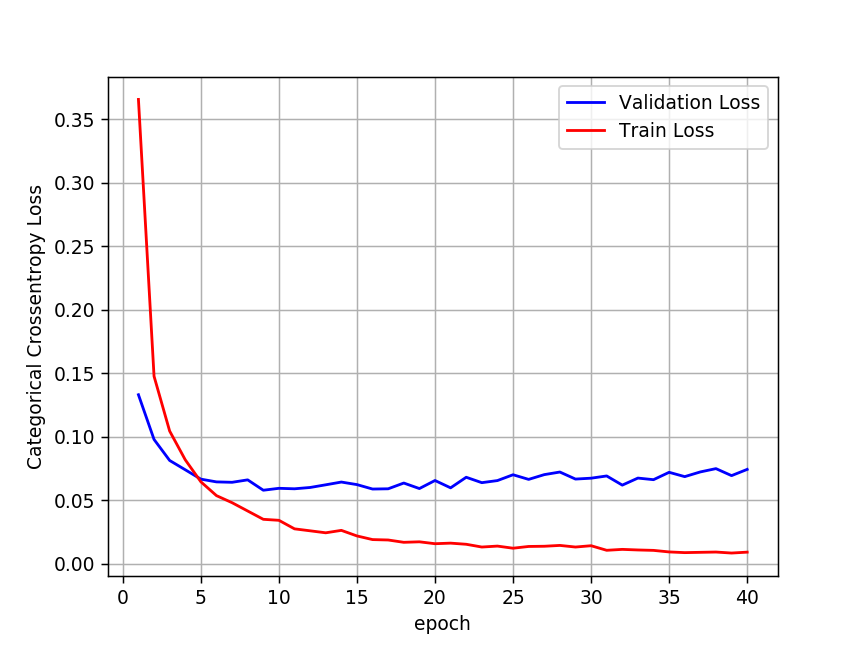

In [27]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


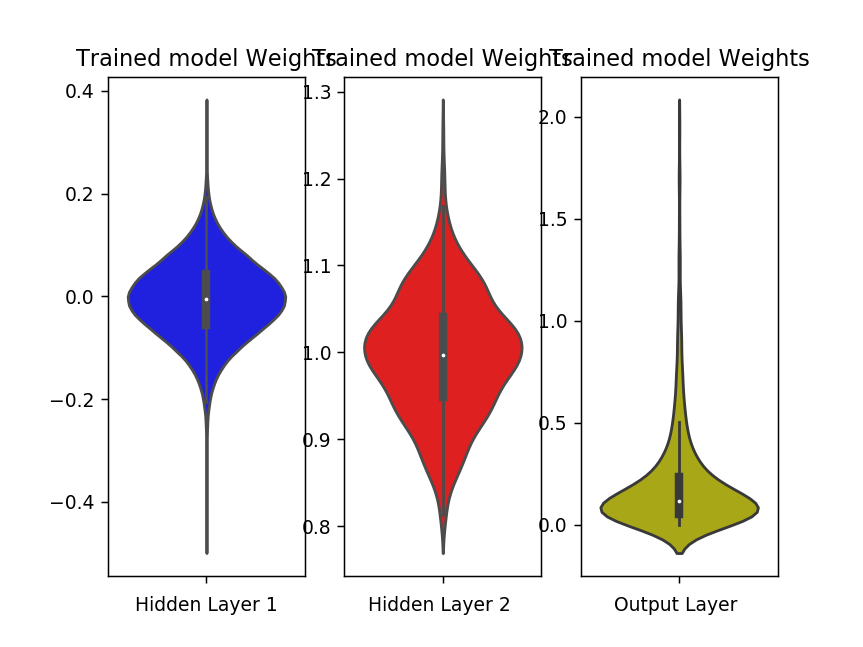

In [28]:
w_after = model_drop.get_weights()
# print(w_after)
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2. MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layer </h2>

In [29]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

# h2 =>  σ=√(2/(fan_in) = sqrt(2/512) = 0.062  => N(0,σ) = N(0,0.062)

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))


# h2 =>  σ=√(2/(fan_in) = sqrt(2/128) = 0.125  => N(0,σ) = N(0,0.125)
model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/64) = 0.176  => N(0,σ) = N(0,0.176)
model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
__________

In [30]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 14s 235us/step - loss: 0.6543 - acc: 0.8027 - val_loss: 0.1960 - val_acc: 0.9419
Epoch 2/40
60000/60000 [==============================] - 10s 173us/step - loss: 0.2572 - acc: 0.9265 - val_loss: 0.1362 - val_acc: 0.9581
Epoch 3/40
60000/60000 [==============================] - 11s 175us/step - loss: 0.1838 - acc: 0.9464 - val_loss: 0.1104 - val_acc: 0.9676
Epoch 4/40
60000/60000 [==============================] - 10s 171us/step - loss: 0.1445 - acc: 0.9579 - val_loss: 0.0934 - val_acc: 0.9724
Epoch 5/40
60000/60000 [==============================] - 10s 170us/step - loss: 0.1218 - acc: 0.9642 - val_loss: 0.0773 - val_acc: 0.9755
Epoch 6/40
60000/60000 [==============================] - 9s 154us/step - loss: 0.0989 - acc: 0.9711 - val_loss: 0.0756 - val_acc: 0.9785
Epoch 7/40
60000/60000 [==============================] - 10s 172us/step - loss: 0.0865 - acc: 0.9741 - val_loss: 0.0

Test score: 0.07178097110373656
Test accuracy: 0.9842


<IPython.core.display.Javascript object>


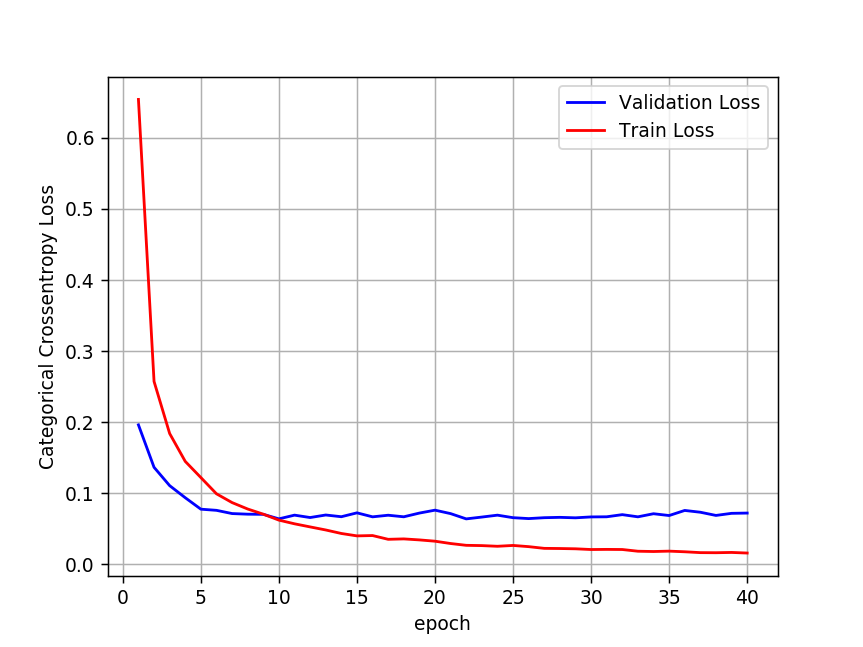

In [31]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


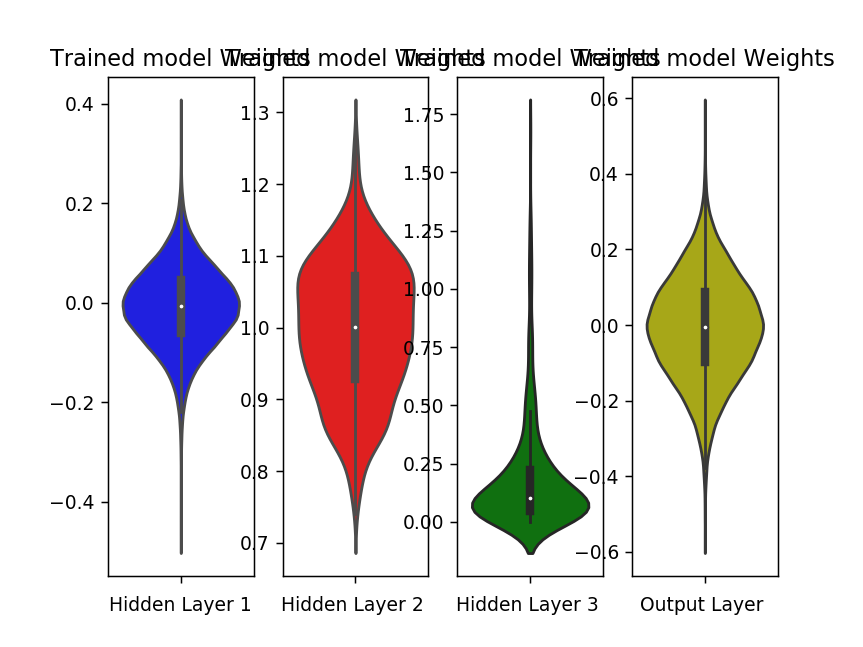

In [32]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3. MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layer </h2>

In [33]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

# h1 =>  σ=√(2/(fan_in) = sqrt(2/600) = 0.057  => N(0,σ) = N(0,0.057)
model_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h2 =>  σ=√(2/(fan_in) = sqrt(2/400) = 0.070  => N(0,σ) = N(0,0.070)
model_drop.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h3 =>  σ=√(2/(fan_in) = sqrt(2/200) = 0.1  => N(0,σ) = N(0,0.1)
model_drop.add(Dense(200, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h4 =>  σ=√(2/(fan_in) = sqrt(2/100) = 0.141  => N(0,σ) = N(0,0.141)
model_drop.add(Dense(100, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

# h5 =>  σ=√(2/(fan_in) = sqrt(2/50) = 0.2  => N(0,σ) = N(0,0.2)
model_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_16 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_17 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               80200     
__________

In [34]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 23s 378us/step - loss: 0.8776 - acc: 0.7324 - val_loss: 0.2132 - val_acc: 0.9373
Epoch 2/40
60000/60000 [==============================] - 17s 275us/step - loss: 0.2849 - acc: 0.9217 - val_loss: 0.1448 - val_acc: 0.9590
Epoch 3/40
60000/60000 [==============================] - 16s 266us/step - loss: 0.1942 - acc: 0.9470 - val_loss: 0.1225 - val_acc: 0.9667
Epoch 4/40
60000/60000 [==============================] - 16s 274us/step - loss: 0.1555 - acc: 0.9569 - val_loss: 0.0972 - val_acc: 0.9731
Epoch 5/40
60000/60000 [==============================] - 17s 280us/step - loss: 0.1290 - acc: 0.9649 - val_loss: 0.0949 - val_acc: 0.9754
Epoch 6/40
60000/60000 [==============================] - 17s 280us/step - loss: 0.1086 - acc: 0.9690 - val_loss: 0.0825 - val_acc: 0.9778
Epoch 7/40
60000/60000 [==============================] - 17s 287us/step - loss: 0.0970 - acc: 0.9729 - val_loss: 0.

Test score: 0.07950580954413017
Test accuracy: 0.9846


<IPython.core.display.Javascript object>


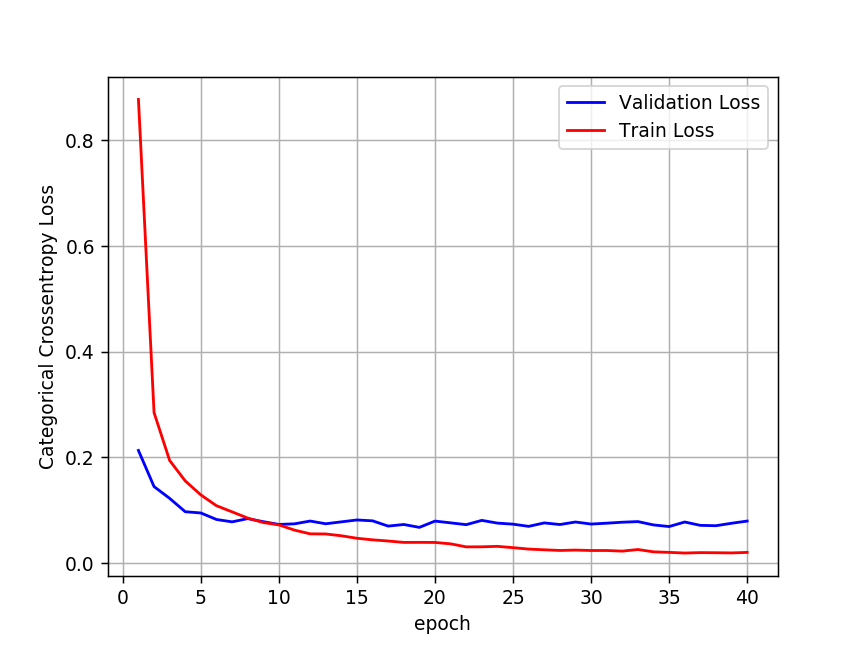

In [35]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


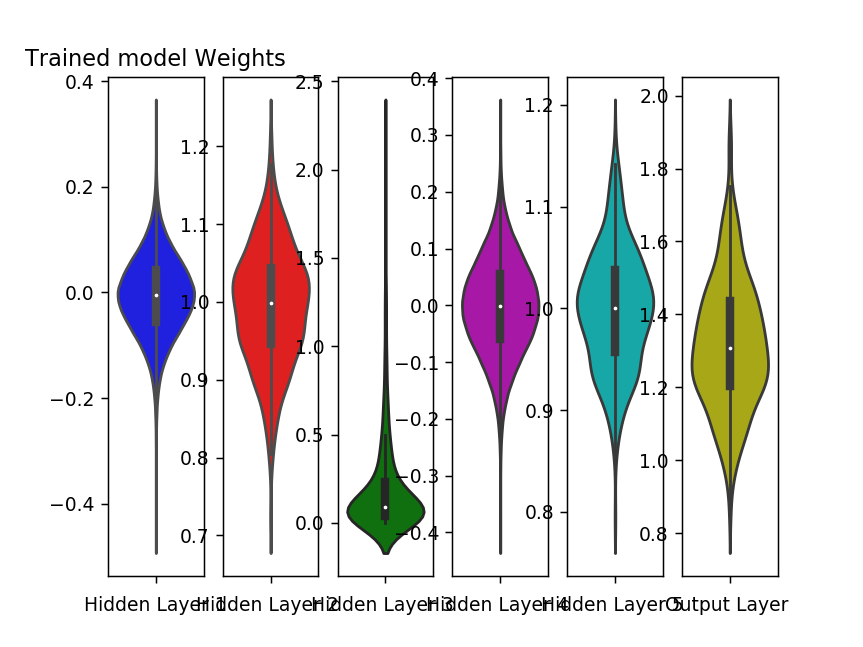

In [36]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [37]:
from prettytable import PrettyTable
    
x = PrettyTable()
y = PrettyTable()
z = PrettyTable()

x.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

x.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers", 0.9970, 0.9840])
x.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layers", 0.9950, 0.9842])
x.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layers", 0.9941, 0.9846])

y.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

y.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers", 0.9922, 0.9827])
y.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layers", 0.9879, 0.9829])
y.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layers", 0.9868, 0.9837])

z.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

z.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers", 0.9647, 0.9740])
z.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layers", 0.9193, 0.9683])
z.add_row(["MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layers", 0.5617, 0.6545])

print(x.get_string(title="Model using 0.3 Drop out"),'\n')
print(y.get_string(title="Model using 0.5 Drop out"),'\n')
print(z.get_string(title="Model using 0.8 Drop out"),'\n')

+---------------------------------------------------------------------------------------+
|                                Model using 0.3 Drop out                               |
+------------------------------------------------------+----------------+---------------+
|                        Model                         | Train Accuracy | Test Accuracy |
+------------------------------------------------------+----------------+---------------+
| MLP + BatchNorm + Dropout + AdamOptimizer + 2 Layers |     0.997      |     0.984     |
| MLP + BatchNorm + Dropout + AdamOptimizer + 3 Layers |     0.995      |     0.9842    |
| MLP + BatchNorm + Dropout + AdamOptimizer + 5 Layers |     0.9941     |     0.9846    |
+------------------------------------------------------+----------------+---------------+ 

+---------------------------------------------------------------------------------------+
|                                Model using 0.5 Drop out                               |
+-------

In [ ]:
# While we are increasing dropout rate and no. of layers our model accuracy decreases